In [1]:
import numpy as np
import pandas as pd
from datetime import datetime as dt
import sys
path_file = ('D:\\Laura_Rojas_Gonzalez\\SimpleSpace\\Datamanager')
sys.path.append(path_file)
from datamanager import DataManager
path_file = ('D:\\Laura_Rojas_Gonzalez\\SimpleSpace\\Calibrator')
sys.path.append(path_file)
from calibrator import Calibrator
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import os
import matplotlib.gridspec as gridspec
import matplotlib.ticker as ticker
from matplotlib.lines import Line2D
from PyPDF2 import PdfFileMerger

In [2]:
path_general = 'D:\\Laura_Rojas_Gonzalez\\SimpleSpace\\Bloque29\\'
path_save = 'D:\\Laura_Rojas_Gonzalez\\SimpleSpace\\Reporte_MinCiencias'
#Obtenemos una lista del nombre de los archivos dentro de la carpeta
list_name = os.listdir(path_general)

#Iteramos para abrir cada archivo y concatenamos para tener un solo df

df_bloque29 = []
for file in list_name:
    load_file = pd.read_csv(f'{path_general}{file}')
    df_bloque29.append(load_file)
df_bloque29 = pd.concat(df_bloque29)

In [3]:
df_bloque29.reset_index()
df_bloque29.reset_index(inplace=True, drop=True)

In [4]:
df_bloque29['time']=df_bloque29['time'].apply(lambda x: dt.strptime(x, '%H:%M:%S'))

In [13]:
#Indicamos las filas del dia 10
for i in range(0,16):
    df_bloque29['time'][i]=df_bloque29['time'].iloc[i].replace(day=10)
#df_bloque29['time']=df_bloque29['time']
#df_bloque29

#Indicamos las filas del dia 11
for i in range(16,23):
    df_bloque29['time'][i]=df_bloque29['time'].iloc[i].replace(day=11)
    
##Para cambiar los segundos a 00
for i in range(0,23):
    df_bloque29['time'].loc[i]=df_bloque29['time'].iloc[i].replace(second=0)
    
for i in range(0,23):
    df_bloque29['time'][i]=df_bloque29['time'].iloc[i].replace(year=2023,month=3)
    
df_bloque29.index = df_bloque29['time']

In [15]:
df_bloque29  = df_bloque29.resample('1T').mean()

In [16]:
df_bloque29

,altitude,lux,barometer_altitude,barometer_pressure,barometer_temperature,humidity,temperature,CO,NOx,NH3,NO2,O3,PM01,PM2_5,PM10
time,,,,,,,,,,,,,,,
2023-03-10 14:20:00,2554.9,3341.0,2429.52,75350.20,24.72,24.50,53.10,-1.0,0.0,556.53,118.82,86.93,0.0,0.0,0.0
2023-03-10 14:21:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-03-10 14:22:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-03-10 14:23:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-03-10 14:24:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-03-10 14:25:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-03-10 14:26:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-03-10 14:27:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-03-10 14:28:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
#Creamos la instancia de la clase con el df cargado
Datamanager = DataManager(dataframe = df_bloque29)
#Cargamos los datos en un dataframe del datamanager
df_eafit29 = Datamanager.load_data()

entre


In [19]:
#Miramos la calidad de datos
Datamanager.show_period(df_eafit29)

La fecha inical del conjunto de datos es 2023-03-10 14:20:00
La fecha final del conjunto de datos es 2023-03-11 11:00:00
No es clara la frecuencia. La frecuencia inicial es 1 minutos
El rango de datos es de: 0 days 20:40:00
El dataset tiene en total 1241 registros 
El dataset no tiene datos repetidos
Los datos están completos, no hay que reindexar
De los 1241 registros válidos el 98.23% fueron NAN.
Además, teniendo en cuenta la fecha inicial y final y la frecuencia de los registros
El máximo posible de registro es de 1241, en este sentido se determina que el sensor 
registró 100.0% del tiempo total


,altitude,lux,barometer_altitude,barometer_pressure,barometer_temperature,humidity,temperature,CO,NOx,NH3,NO2,O3,PM01,PM2_5,PM10
2023-03-10 14:20:00,2554.9,3341.0,2429.52,75350.20,24.72,24.50,53.10,-1.0,0.0,556.53,118.82,86.93,0.0,0.0,0.0
2023-03-10 14:21:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-03-10 14:22:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-03-10 14:23:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-03-10 14:24:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-03-10 14:25:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-03-10 14:26:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-03-10 14:27:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-03-10 14:28:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-03-10 14:29:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
fig = plt.figure(figsize=(8,5))
fig_1 = Datamanager.graphic(df_cali_simple,'temperatura','°C',0,50,color='#DF2E2E',fig=fig)

In [86]:
df_eafit29['barometer_pressure']=df_eafit29['barometer_pressure']/100

In [22]:
time_vect=pd.date_range(start='2023-03-10 14:20:00', end='2023-03-11 11:00:00', freq='T')
len(time_vect)

1241

In [23]:
time_vect

DatetimeIndex(['2023-03-10 14:20:00', '2023-03-10 14:21:00',
               '2023-03-10 14:22:00', '2023-03-10 14:23:00',
               '2023-03-10 14:24:00', '2023-03-10 14:25:00',
               '2023-03-10 14:26:00', '2023-03-10 14:27:00',
               '2023-03-10 14:28:00', '2023-03-10 14:29:00',
               ...
               '2023-03-11 10:51:00', '2023-03-11 10:52:00',
               '2023-03-11 10:53:00', '2023-03-11 10:54:00',
               '2023-03-11 10:55:00', '2023-03-11 10:56:00',
               '2023-03-11 10:57:00', '2023-03-11 10:58:00',
               '2023-03-11 10:59:00', '2023-03-11 11:00:00'],
              dtype='datetime64[ns]', length=1241, freq='T')

In [24]:
df_eafit29.index=pd.to_datetime(df_eafit29['time'])

In [27]:
df_eafit29.drop(['time'], axis = 1, inplace=True)

In [196]:
df_eafit29['NH3'].unique()

array([556.53,    nan, 598.6 , 643.62, 678.36, 673.92, 705.59, 738.68,
       758.26, 753.32, 691.85, 656.45, 669.51, 590.74, 254.59, 288.31,
       286.43, 275.41, 273.61, 282.71])

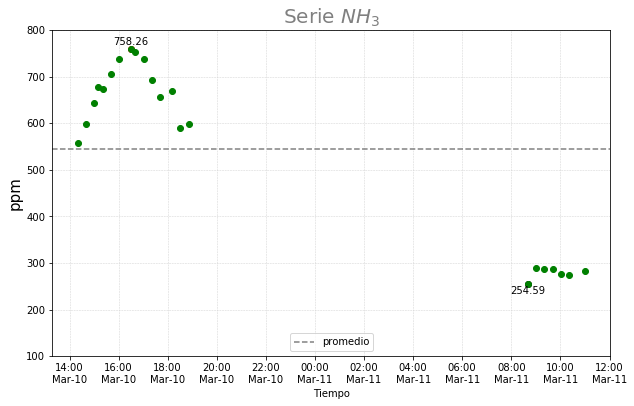

In [207]:
fig = plt.figure(figsize=(10,6))

ax = fig.add_subplot(111)
plt.plot(df_eafit29.index,df_eafit29.NH3.values, lw = 5, marker = 'o',color='g')
ax.set_ylim(100,800)
ax.set_ylabel(f"ppm", fontsize=15,  color='black')
ax.set_xlabel("Tiempo", fontsize=10, color='black')
# #ax.set_xlim(data.index[0], data.index[-1])
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M\n%b-%d'))
ax.tick_params(axis = 'y',color='black', labelcolor='black')
ax.tick_params(axis = 'x',color='black', labelcolor='black')
ax.grid(which='major',  linestyle='--', linewidth=0.5, color='lightgray')
ax.set_title(r'Serie $NH_3$', fontsize=20, color='gray')
# ax.xaxis.set_major_locator(ticker.MaxNLocator(nbins=8))

# plt.legend(loc= 0, fontsize = labelsize)

min_x = np.argmin(df_eafit29['NH3'])
min_y = np.min(df_eafit29['NH3'])
min_y = round(min_y,2)

max_x = np.argmax(df_eafit29['NH3'])
max_y = np.max(df_eafit29['NH3'])
max_y = round(max_y,2)

plt.scatter(min_x, min_y,c='k')
plt.scatter(max_x, max_y,c='r')

plt.annotate(min_y,(min_x,min_y),textcoords="offset points",xytext=(0,-10),ha='center')
plt.annotate(max_y,(max_x,max_y),textcoords="offset points",xytext=(0,5),ha='center')

plt.axhline(y=np.nanmean(df_eafit29['NH3']),color='gray', lw=1.5, ls='--', label="promedio")
plt.legend(loc='lower center')

plt.show()

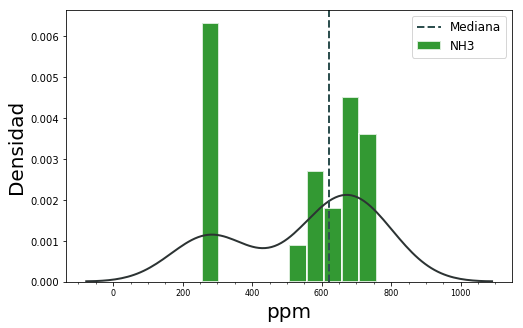

In [193]:
Datamanager.histogram(df_eafit29,fig = plt.figure(figsize=(8,5)),labelsize = 10,
                             variable = 'NH3',unit=r'ppm', color_hist='g')